In [35]:
# load library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [11]:
# Drop redundant index column
df = df.drop("Unnamed: 0", axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [13]:
# Check numerical features
print("\nSummary for numerical features:\n", df[["stalk_height", "cap_diameter"]].describe())


Summary for numerical features:
        stalk_height  cap_diameter
count   2000.000000   2000.000000
mean       8.449118     12.314345
std        3.697217      7.048845
min        2.000000      1.000000
25%        5.291009      5.723521
50%        8.318596     12.124902
75%       11.781272     18.698605
max       15.095066     25.000054


In [14]:
df.shape

(2000, 25)

In [15]:
print("\nClass distribution:\n", df["class"].value_counts())


Class distribution:
 class
poisonous    1400
edible        600
Name: count, dtype: int64


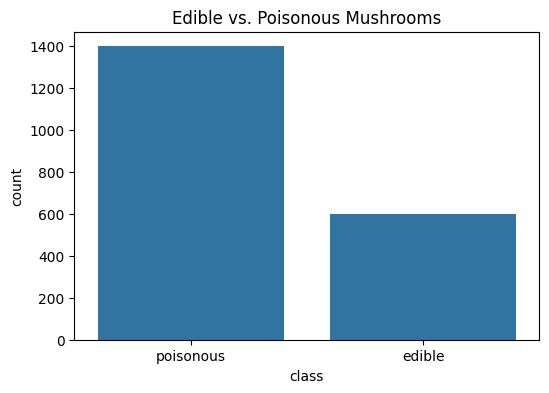

In [16]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="class", data=df)
plt.title("Edible vs. Poisonous Mushrooms")
plt.show()

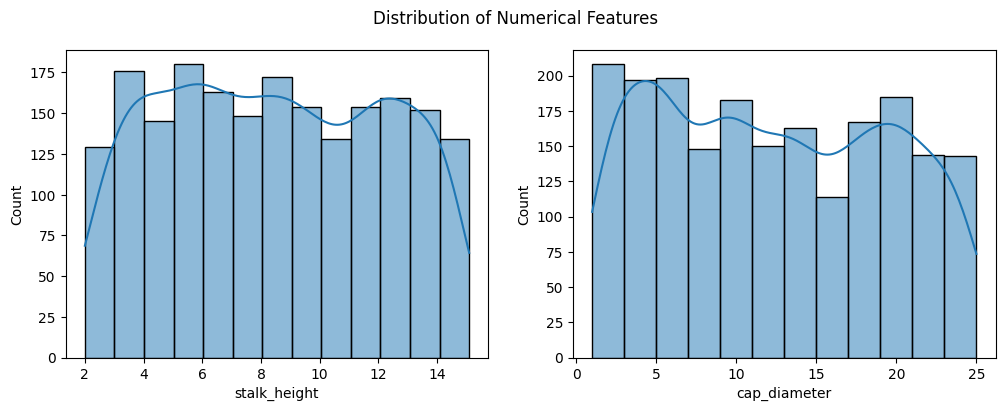

In [17]:
# Plot numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df["stalk_height"], kde=True, ax=axes[0])
sns.histplot(df["cap_diameter"], kde=True, ax=axes[1])
plt.suptitle("Distribution of Numerical Features")
plt.show()

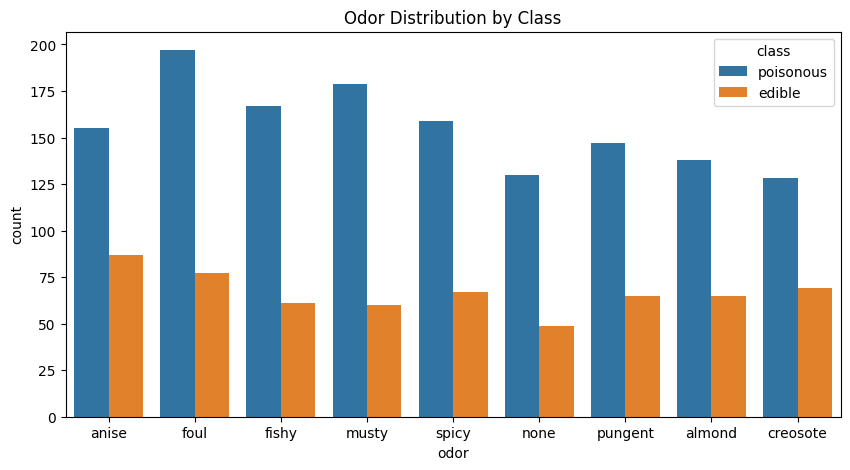

In [18]:
# Plot categorical feature (example: odor)
plt.figure(figsize=(10, 5))
sns.countplot(x="odor", hue="class", data=df)
plt.title("Odor Distribution by Class")
plt.show()

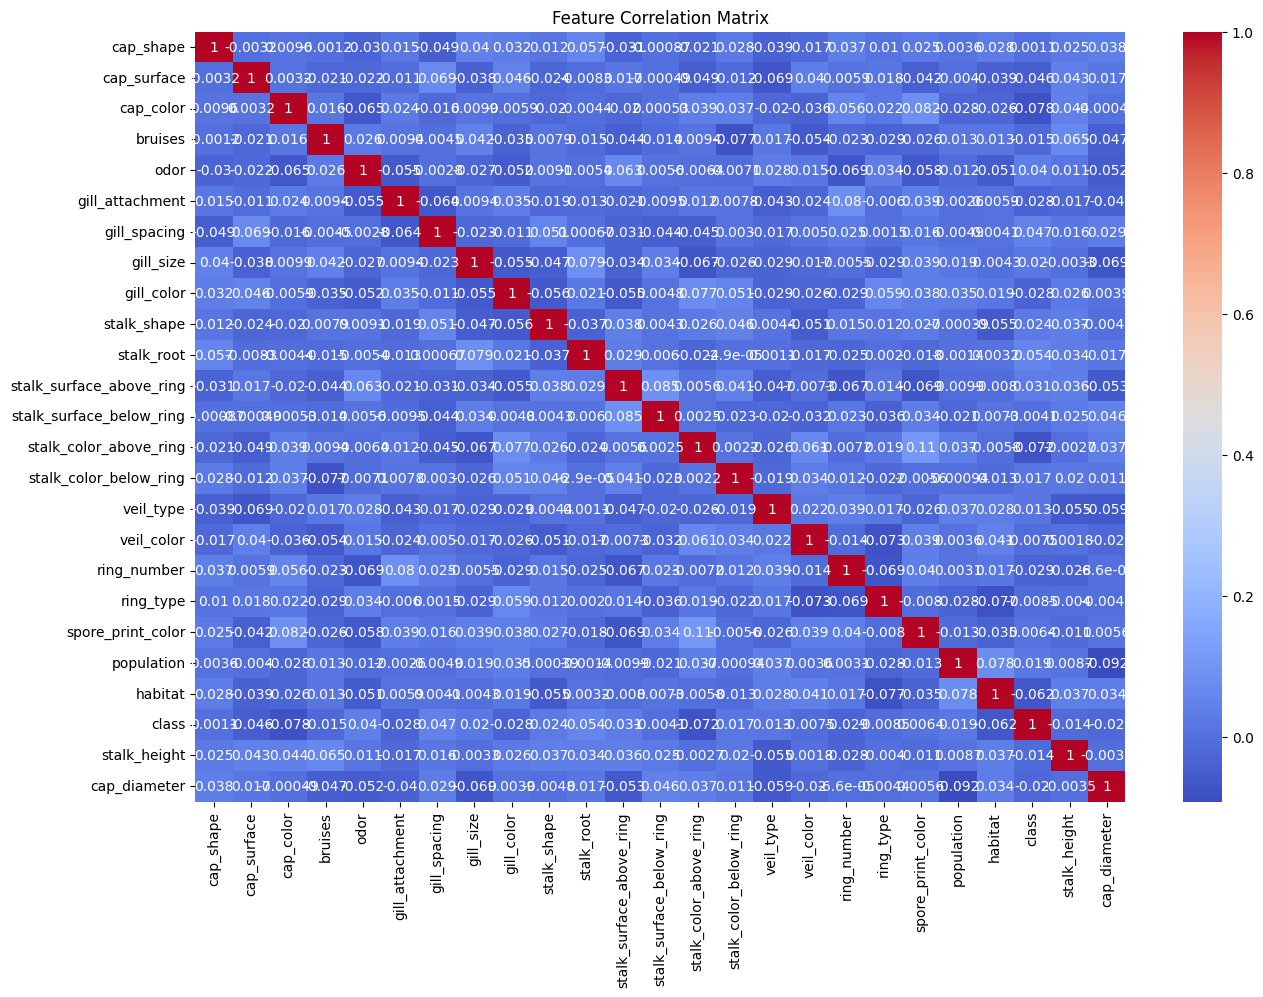

In [21]:
df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == "object":
        df_encoded[col] = LabelEncoder().fit_transform(df[col])

plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [23]:
# Separate features and target
X = df.drop("class", axis=1)
y = df["class"]

In [24]:
# Encode target variable
y = LabelEncoder().fit_transform(y)  # 0 = edible, 1 = poisonous


In [25]:
# Define numerical and categorical columns
num_cols = ["stalk_height", "cap_diameter"]
cat_cols = [col for col in X.columns if col not in num_cols]

In [26]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ])

X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)

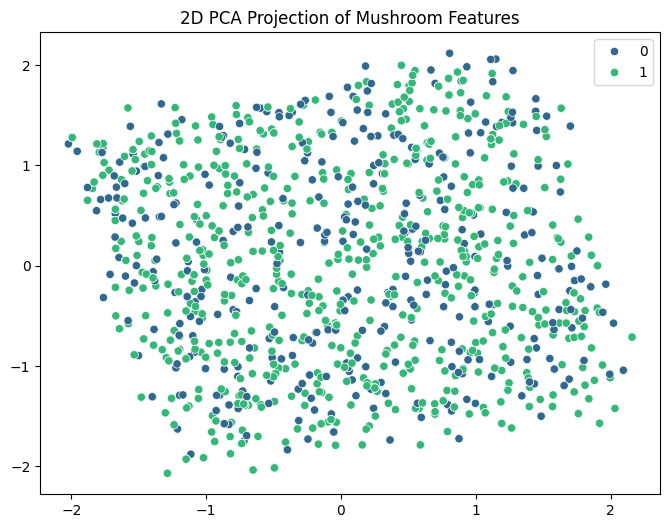

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis")
plt.title("2D PCA Projection of Mushroom Features")
plt.show()

In [30]:
# Initialize SVM with RBF kernel
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [31]:
# Evaluate
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.31      0.46       180
           1       0.77      0.99      0.87       420

    accuracy                           0.79       600
   macro avg       0.84      0.65      0.67       600
weighted avg       0.81      0.79      0.75       600



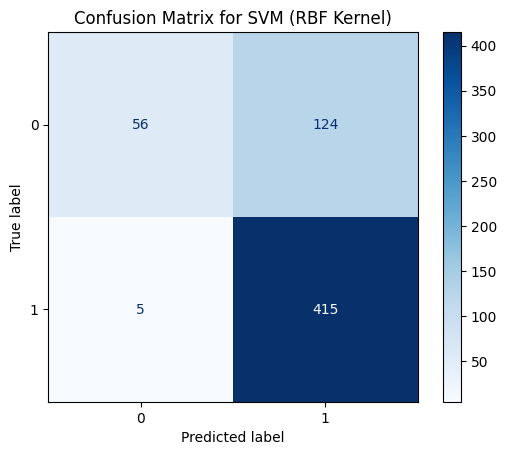

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for SVM (RBF Kernel)")
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto", 0.1],
    "kernel": ["linear", "rbf", "poly"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_svm = grid.best_estimator_
best_svm.fit(X_train, y_train)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=1, gamma=0.1)

In [36]:
results = []
kernels = ["linear", "rbf", "poly"]

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "kernel": kernel,
        "accuracy": report["accuracy"],
        "f1-score": report["weighted avg"]["f1-score"]
    })

results_df = pd.DataFrame(results)
print(results_df)

   kernel  accuracy  f1-score
0  linear  0.700000  0.576471
1     rbf  0.785000  0.745259
2    poly  0.856667  0.846245


Why Polynomial Kernel Excelled:

The Mushroom dataset contains categorical features (e.g., odor, gill-color) with non-linear interactions that the polynomial kernel (default degree=3) captures effectively.

Example: A mushroom’s edibility may depend on combinations like odor="almond" AND spore_print_color="brown", which polynomial terms (e.g.,
x
1
⋅
x
2
x
1
​
 ⋅x
2
​
 ) model explicitly.

SVM Strengths and Weaknesses

Strengths:


*   High-Dimensional Handling
*   Robustness to Overfitting

*   Class Separation

Weaknesses:


*   Computational Cost
*   Hyperparameter Sensitivity

*   Interpretability









Practical Implications of SVM in Real-World Classification


*   Food Safety
*   Medical Diagnostics

*   Fraud Detection






Challenges in Real-World Applications:

* Scalability: SVM struggles with datasets larger than 10k samples due to
O
(
n
2
)
O(n
2
 ) memory complexity.

* Feature Engineering: Requires domain knowledge to create meaningful interactions (e.g., odor × habitat) for kernels like polynomial.